In [3]:
import sys
sys.path.append("..")

import data_frame
import models
import importlib
import evaluator as ev
import yaml

In [4]:
def load_config(config_path):
    with open(config_path, 'r') as file:
        config = yaml.full_load(file)
    return config

In [5]:
config = load_config("configs/config.yml")

In [7]:
filePath = "../KiDS-DR5-WCScut_x_DESI-DR1-small.fits"
df = data_frame.DataFrame(filePath, "QSO", data_frame.MaxFiller())

In [5]:
# df.data.loc[df.data["faint"], "MAG_GAAP_r"]

In [8]:
importlib.reload(models)
model = models.MLModelContext(strategy=models.MixtureGaussian(df, config))

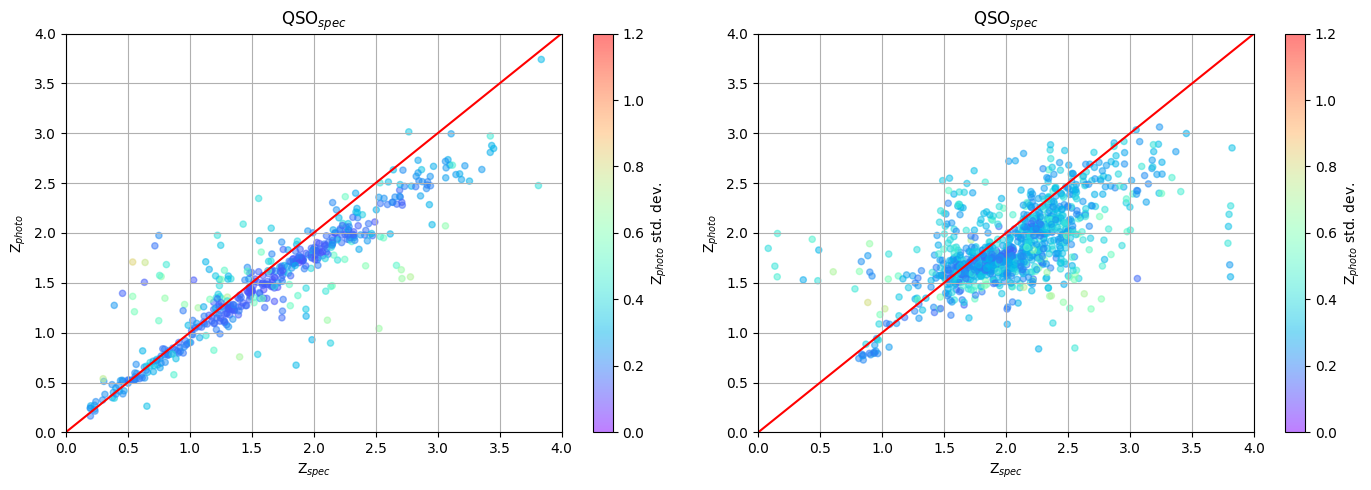

,MSE,R^2,Redshift error,NLL
test,0.131533,0.765304,"(-0.033866714911806636, 0.13406870798315673)",1.430196
faint,0.267186,0.217297,"(-0.04927757145069532, 0.1589515598421612)",0.929973


In [7]:
importlib.reload(ev)

evaluator = ev.Evaluator(df)
evaluator.redshift_std()
evaluator.evaluate_metrics()
metrics = evaluator.evaluate_metrics()
# metrics.to_csv("../../metrics/sg_mean_stddev_dropout_2.csv")
metrics

In [10]:
df.data[df.data["split"] == "test"].to_csv(f"{model.getModelName()}_1")

In [7]:
df.get_faint_test_dataset()

(         MAG_GAAP_u  MAG_GAAP_g  MAG_GAAP_r  MAG_GAAP_i1  MAG_GAAP_i2  \
 204       23.809851   23.929075   24.829887    23.315115    23.205559   
 302       24.106501   23.758213   23.779669    23.541826    23.714209   
 617       24.554985   23.739975   22.954510    22.060011    22.068087   
 665       24.166492   23.260216   23.077255    23.072994    22.657591   
 808       24.208237   23.945938   23.016512    22.694908    22.364906   
 ...             ...         ...         ...          ...          ...   
 2647075   24.747461   23.819902   23.994846    23.556417    24.407187   
 2648290   22.659027   23.220350   23.380877    23.252119    22.966743   
 2648430   23.603884   23.506834   23.415977    22.333576    22.663576   
 2648757   24.427263   23.900318   23.764061    23.107727    23.605057   
 2649258   23.669382   22.856256   23.034378    24.321497    22.947109   
 
          MAG_GAAP_Z  MAG_GAAP_Y  MAG_GAAP_J  MAG_GAAP_H  MAG_GAAP_Ks  ...  \
 204       23.610514   23.938856

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
import numpy as np
tfd = tfp.distributions

In [ ]:
normal = tfd.Normal(loc=1, scale=1)
samples = normal.sample(10000).numpy()
lower = np.percentile(samples, 16, axis=0)
upper = np.percentile(samples, 84, axis=0)
std = (upper - lower) / 2
np.median(samples), samples.std(), std

In [16]:
import pandas as pd

pd.read_csv("../dataframes/experiment2/MG_1_components_1.csv")[["split","Z_pred","Z"]]

,Unnamed: 0,ID,RAJ2000,DECJ2000,MAG_GAAP_u,MAGERR_GAAP_u,MAG_GAAP_g,MAGERR_GAAP_g,MAG_GAAP_r,MAGERR_GAAP_r,...,Z-Ks,Y-J,Y-H,Y-Ks,J-H,J-Ks,H-Ks,Z_pred,Z_pred_std,Z_spec_prob
0,0,b'KiDSDR5 J083706.078+000000.11 ',129.275328,0.000031,20.071587,0.010908,20.030886,0.004359,20.716307,0.009988,...,0.011642,-0.165136,-0.073978,0.016731,0.091158,0.181868,0.090710,0.000000,0.000000,NaN
1,1,b'KiDSDR5 J083756.584+000000.23 ',129.485767,0.000066,23.471176,0.237037,22.261936,0.035937,21.481810,0.021359,...,1.388453,0.313883,0.689295,1.092005,0.375412,0.778122,0.402710,0.000000,0.000000,NaN
2,14,b'KiDSDR5 J083435.235+000014.79 ',128.646815,0.004110,21.921549,0.053793,21.577192,0.017536,20.920393,0.011816,...,0.716286,0.446337,0.222651,0.460604,-0.223686,0.014267,0.237953,0.000000,0.000000,NaN
3,23,b'KiDSDR5 J083657.112+000024.33 ',129.237967,0.006759,24.003103,0.352380,23.531046,0.131295,22.640545,0.056568,...,1.559633,0.186361,0.691217,1.295124,0.504856,1.108763,0.603907,0.000000,0.000000,NaN
4,49,b'KiDSDR5 J083528.320+000055.82 ',128.868002,0.015507,20.389843,0.018147,20.205662,0.006450,20.336668,0.006978,...,0.036829,-0.098209,-0.262089,0.039040,-0.163879,0.137249,0.301128,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157844,2649220,b'KiDSDR5 J133755.451+025735.07 ',204.481046,2.959742,24.541634,0.431530,22.968502,0.057104,22.916708,0.055146,...,-4.240843,0.257837,-0.407724,-4.350306,-0.665562,-4.608143,-3.942581,0.000000,0.000000,NaN
157845,2649223,b'KiDSDR5 J133927.920+025737.70 ',204.866337,2.960474,22.013160,0.052350,22.195482,0.028221,21.824081,0.021200,...,1.075180,0.227394,0.320320,0.805365,0.092926,0.577971,0.485044,0.000000,0.000000,NaN
157846,2649230,b'KiDSDR5 J133628.789+025740.44 ',204.119957,2.961236,20.795778,0.015772,20.829432,0.007743,20.658283,0.007675,...,1.045036,0.493315,0.500889,0.948719,0.007574,0.455404,0.447830,0.000000,0.000000,NaN
157847,2649258,b'KiDSDR5 J133828.452+025804.76 ',204.618554,2.967990,23.669382,0.241664,22.856256,0.049069,23.034378,0.059874,...,1.412277,0.782425,0.924517,1.109282,0.142092,0.326857,0.184765,2.281845,0.397634,0.740283


In [15]:
!pwd

/home/kdrabicki/projekt


In [20]:
class DropoutDict(dict):
    def __missing__(self, key):
        return 0 if key == 1 else 0.2
dropout_dict = DropoutDict()
dropout_dict[2]

0.2